<a href="https://colab.research.google.com/github/younghoonNa/Machine_Leraning-Bitcoin-Price-Production/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=15> 20185124 빅데이터 나영훈 머신러닝 프로젝트<br> </font>
<font size=5> 주제 : 비트코인 가격 예측 

# <b> 1단계 큰 그림  보기 </b>
1. 문제파악 : 비트코인의 10일 뒤 가격을 예측하는 머신러닝 프로그램 작성.  <br>
&nbsp;&nbsp; -> 이 프로그램을 통해 비트코인 투자 여부 결정가능.<br>
&nbsp;&nbsp; 1-1. 기존의 솔루션 : 비트코인의 경우 매우 변동성이 크기 때문에 예측이 힘듬. <br>
&nbsp;&nbsp; &nbsp;&nbsp; ++ 예측 프로그램이 있다고 하더라도 유료이므로 접하기가 쉽지 않으며 성능이 좋지 않음. <br>
&nbsp;&nbsp; 1-2. 시스템 설계 방향 : &nbsp; 지도학습/비지도/강화학습 &nbsp; | &nbsp; 분류/회기 &nbsp; | &nbsp; 배치/온라인 <br>
&nbsp;&nbsp; &nbsp;&nbsp; -> 레이블이 존재하므로 지도학습, 레이블 : 비트코인의 가격 <br>
&nbsp;&nbsp; &nbsp;&nbsp; -> 연속된 값을 예측하는 회기문제, 특징은 하나만 사용 단변량 회귀(단일 종가) <br>
&nbsp;&nbsp; &nbsp;&nbsp; -> 데이터 학습은 오프라인으로 준비하는 배치 학습. <br>

1. 성능측정지표 선택 -> 회기분석의 성능 측정 지표는 RMSE (Root Mean Square Error) 사용. <br>
&nbsp;&nbsp; -> 코로나와 같이 성능 측정지표로 RMSE 사용. <br>

1. 가정검사. -> 비트코인 가격 예측 : 회기문제 <br>
&nbsp;&nbsp; -> 1. 우선 10일 뒤 가격 예측  <br>
&nbsp;&nbsp; -> 2. 10분뒤 가격 예측, 데이터가 어마무시하게 많아짐.  <br>
&nbsp;&nbsp; -> 3. 다른 종목도 예측해보기.  <br>



# <b> 2단계 데이터 가져오기. </b>
1. 데이터 다운로드 <br>
&nbsp; &nbsp; 실습 환경 : 구글 코랩 <br>
&nbsp; &nbsp; 데이터 다운로드 : 케글에서 데이터 가져오기 -> 최근 2,3 개월의 데이터가 존재하지 않음, 단위가 USD($) 인경우가 많음. <br>
&nbsp; &nbsp; 데이터 다운로드를 업비트 Open API / Rest IP 를 활용하여 가져옴.

1. 데이터 구조 보기
1. 테스트세트 만들기. 


## 2-0. 데이터 다운로드 전, 머신러닝 학습에 필요한 환경 세팅.

In [609]:
#데이터를 업비트에서 가져오기 위해 pyupbit라는 모듈 다운을 받고 import 해줍니다.
!pip install pyupbit
import pyupbit

In [610]:
#머신러닝 시작 전 필요한 데이터 Import 해주기.
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import operator 
plt.style.use('seaborn-poster')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

In [611]:
#업비트의 비트코인 상장 날짜인 2017년 9월 25일 부터 지금까지의 날짜 계산
#2017년 9월 25일 부터 현재까지의 데이터를 가져오기 위해서 필요.
import datetime

time_2017_09_25 = datetime.datetime(2017,9,25,0,0,0)
time_now = datetime.datetime.now()

time = ((time_now - time_2017_09_25).days)
print(time)

1528


##2-1 데이터 다운로드.

In [612]:
# 업비트의 API를 사용하기 위해 key를 넣어둠.
access_key = "your_Access_key"
secret_key ="Secret_key"

#업비트에서 가격을 가져오는 get_ohlcv 함수 사용. 
#데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", count = time+10, period=0.01)

## 2-2 데이터 구조 보기.

In [613]:
bitcoin_data = df
bitcoin_data

,open,high,low,close,volume,value
2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...
2021-11-27 09:00:00,68550000.0,70276000.0,68140000.0,70039000.0,4865.737853,3.383817e+11
2021-11-28 09:00:00,70039000.0,72691000.0,68607000.0,72303000.0,5439.530304,3.809438e+11
2021-11-29 09:00:00,72255000.0,73166000.0,71298000.0,72240000.0,5965.745427,4.312498e+11
2021-11-30 09:00:00,72241000.0,73300000.0,70000000.0,70702000.0,8717.765862,6.233846e+11


##2-3 테스트 셋 분리 전 전처리 <br>

여기서는 테스트 셋 분리 전. 특징을 하나만 사용하는 단변량 회기를 사용한다고 하였으므로, 종가와 시작 index를 사용하기 전에 없애주는 전처리 작업 진행.


### 레이블(y) , 특성(x) 설정.

레이블(반응변수) y는 그 날의 종가, 특성(설명변수) x도 존재해야 하므로 index를 넣어줌. 나중에 그래프를 그릴 때 사용할 date도 사용하기 위해서 지금 작업 진행. <br>
+ 나중에 시계열 데이터 학습 모델인 Prophet를 사용하기 위해서는 설명변수 x에 ds, 반응변수 y는 y로 지정해줘야함.<br> -> 여기서 한번에 진행 및 다른 모델도 같은 데이터 사용.

In [614]:
bitcoin = bitcoin_data.reset_index() #index를 넣기 위해서 넣어줌 

#시계열 분석 모델인 Prophet을 쓰기 위해선 x를 ds로 y를 y로 이름을 바꿔야함.
bitcoin['ds'] = bitcoin['index']
bitcoin['y'] = bitcoin['close']
bitcoin = bitcoin[['ds', 'y']]

bitcoin_date = bitcoin['ds']
bitcoin_price = bitcoin['y']

print(bitcoin_date)

#2017년 데이터 부터, 현재 날짜, 10일 후의 날짜 데이터가 잘 들어있는지 확인.
print("\n오늘의 날짜는 : ", time_now, "\n")

print(bitcoin_price)

0      2017-09-25 09:00:00
1      2017-09-26 09:00:00
2      2017-09-27 09:00:00
3      2017-09-28 09:00:00
4      2017-09-29 09:00:00
               ...        
1531   2021-11-27 09:00:00
1532   2021-11-28 09:00:00
1533   2021-11-29 09:00:00
1534   2021-11-30 09:00:00
1535   2021-12-01 09:00:00
Name: ds, Length: 1536, dtype: datetime64[ns]

오늘의 날짜는 :  2021-12-01 16:42:55.963201 

0        4322000.0
1        4321000.0
2        4657000.0
3        4586000.0
4        4657000.0
           ...    
1531    70039000.0
1532    72303000.0
1533    72240000.0
1534    70702000.0
1535    72537000.0
Name: y, Length: 1536, dtype: float64


### index 생성.

10일뒤 가격을 예측할 때 사용할 인덱스 및 그래프 그릴 때 사용할 인덱스 작업.

In [615]:
#bitcoin_date 데이터 전처리 -> 뒤에 시간 09:00:00 빼기.
print("Bitcoin dataframe len : ", len(bitcoin), "\n")
for i in range(len(bitcoin['ds'])):  
  bitcoin_date[i] = bitcoin_date[i].strftime("%Y-%m-%d")

Bitcoin dataframe len :  1536 



In [616]:
# def daily_increase(data):
#     d = [] 
#     for i in range(len(data['y'])):
#         if i == 0:
#             d.append(data['y'][0])
#         else:
#             d.append(data['y'][i]-data['y'][i-1])
#     return d 

# def moving_average(data, window_size):
#     moving_average = []
#     for i in range(len(data)):
#         if i + window_size < len(data):
#             moving_average.append(np.mean(data[i:i+window_size]))
#         else:
#             moving_average.append(np.mean(data[i:len(data)]))
#     return moving_average

# # window size
# window = 7

# bitcoin_daily_increase = daily_increase(bitcoin)
# bitcoin_confirmed_avg = moving_average(bitcoin, window)
# bitcoin_daily_increase_avg = moving_average(bitcoin_daily_increase, window)

In [617]:
now = datetime.datetime.now()
now_date = now.strftime("%Y-%m-%d")
print("now date =  : ", now_date, '\n')

#인덱스 확장 공사 
days_in_future = 10
next10day_index = np.array([i for i in range(len(bitcoin)+days_in_future)]).reshape(-1, 1)
adjusted_index = next10day_index[:-10]

#date 확장 -> 마지막 그래프 그릴 때 사용
next10day_date = bitcoin_date
for i in range(1,11):  
  temp = (now + datetime.timedelta(days=i))
  temp = temp.strftime("%Y-%m-%d")
  next10day_date[(len(bitcoin)+i)] = (temp)


now date =  :  2021-12-01 



In [618]:
print(adjusted_index[-3:])
print(next10day_index[-3:])
print(next10day_date[-15:])

[[1533]
 [1534]
 [1535]]
[[1543]
 [1544]
 [1545]]
1531    2021-11-27
1532    2021-11-28
1533    2021-11-29
1534    2021-11-30
1535    2021-12-01
1537    2021-12-02
1538    2021-12-03
1539    2021-12-04
1540    2021-12-05
1541    2021-12-06
1542    2021-12-07
1543    2021-12-08
1544    2021-12-09
1545    2021-12-10
1546    2021-12-11
Name: ds, dtype: object


### 데이터 학습시 데이터의 크기가 달라서 생기는 오류 방지 -> Reshape(-1,1) 사용.

In [619]:
bitcoin_price = np.array(bitcoin_price).reshape(-1, 1)
print(bitcoin_price)

print("=================")
bitcoin_date = np.array(bitcoin_date).reshape(-1, 1) 
print(bitcoin_date)

[[ 4322000.]
 [ 4321000.]
 [ 4657000.]
 ...
 [72240000.]
 [70702000.]
 [72537000.]]
[['2017-09-25']
 ['2017-09-26']
 ['2017-09-27']
 ...
 ['2021-12-09']
 ['2021-12-10']
 ['2021-12-11']]


In [620]:
# bitcoin_date_reshape = np.array(bitcoin_date).reshape(-1, 1) 
# print(bitcoin_date_reshape)
# print(type(bitcoin_date_reshape))
# index를 reshape해주면 날짜 값이 이상하게 바뀌는 현상 발생
# bitcoin_date_reshape를 주석처리 해주고 bitcoin_date_reshape를 그래프 그린 후에 처리하겠음.


# 인덱스 처리과정 필요시 주석 해제.

##2-3 Test set / Train set 분리 -> sklearn의 test_train_split() 사용
### 4-4의 특징 스케일링 작업을 먼저 진행 
  -> why 여기서 train test 2개로 나누면 2번 스케일링 진행해주어야 하기 때문. <br>
  ++ train 데이터에는 fit_transform, test set에는 transfrom을 해줘야하기 때문 -> 매우 번거로움. <br>

---
<b>Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed</b><br>
-> 많은 학습 모델과 알고리즘은 정규분포에 더 가까울 때 잘 작동한다.

1. 비트코인은 단위가 천만이므로 매우 큼. 즉 변수의 이동이 크기 때문에 스케일링 필수. <br>
  -> 비트코인은 StandardScaler 대신 MinMaxScaler 사용 <br>
&nbsp; &nbsp; + StandardScaler보다 성능은 조금 떨어질지라도 본래 데이터 집합의 모양을 보존하기 때문. 원본 데이터에 포함된 정보를 그대로 변경하기 때문. 0 ~ 1 <br>
&nbsp; &nbsp; + 비트코인은 정규분포가 되지 않아도 괜찮다고 판단. <br>

. 시계열 데이터인 비트코인을 예측하는 것 이기 때문에 suffle -> false (섞지 않음)<br>
. 최근 1,2 달 정도의 데이터가 test set이 됨. test set의 비율이 적음  <br>
. 데이터 스누핑 및 샘플링 편향 문제 -> 섞지 않기 때문에 문제 없음. <br>


In [621]:
#MinMaxScaler 사용한 특징 스케일링.  adjusted_index, bitcoin_price 스케일링 필요.

from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

next10day_index_sc = scalerX.fit_transform(next10day_index)
adjusted_index_sc = scalerX.transform(adjusted_index)

bitcoin_price_sc = scalerY.fit_transform(bitcoin_price)

In [622]:
X_train_date, X_test_date, y_train_price, y_test_price = train_test_split(adjusted_index_sc, 
                                                                          bitcoin_price_sc, test_size=0.025, shuffle=False) 

#테스트 데이터 사이즈를 0.025로 가져가도 한달 반 정도의 데이터, 꽤 많음. . 

In [623]:
print(X_train_date[-3:], X_train_date.shape)
print(y_train_price[-3:], y_train_price.shape)
print(X_test_date[:3], X_test_date[-3:],X_test_date.shape)
print(y_test_price[:3], y_test_price.shape)

[[0.96699029]
 [0.96763754]
 [0.96828479]] (1497, 1)
[[0.93562944]
 [0.90950581]
 [0.91549676]] (1497, 1)
[[0.96893204]
 [0.96957929]
 [0.97022654]] [[0.99223301]
 [0.99288026]
 [0.99352751]] (39, 1)
[[0.9112671 ]
 [0.93310964]
 [0.89573691]] (39, 1)


In [624]:
print(type(X_train_date))
print(type(X_test_date))
print(type(y_test_price))
print(type(y_train_price))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


비트코인 가격 예측 -> 비선형

분석시에 변수들의 값 차이가 큼
> 변수들의 단위가 커서 값 차이가 너무 큼 -> 스케일링 필요. <br>
> 
> StandardScaler / MinMaxScaler 중 MinMaxScaler를 통해 스케일링 진행
>> MinMaxScaler를 통한 나중 가격으로 되돌리기 편함.

#3. 데이터 이해를 위한 탐색과 시각화

1. 시각화
1. 상관계수 조사 -> 단변량 회기이기 때문에 상관계수 찾지 못함. (PASS)
1. 특징조합. -> 마찬가지로 단변량 회기이기 때문에 상관계수 찾지 못함 (PASS)

##3-1 시각화

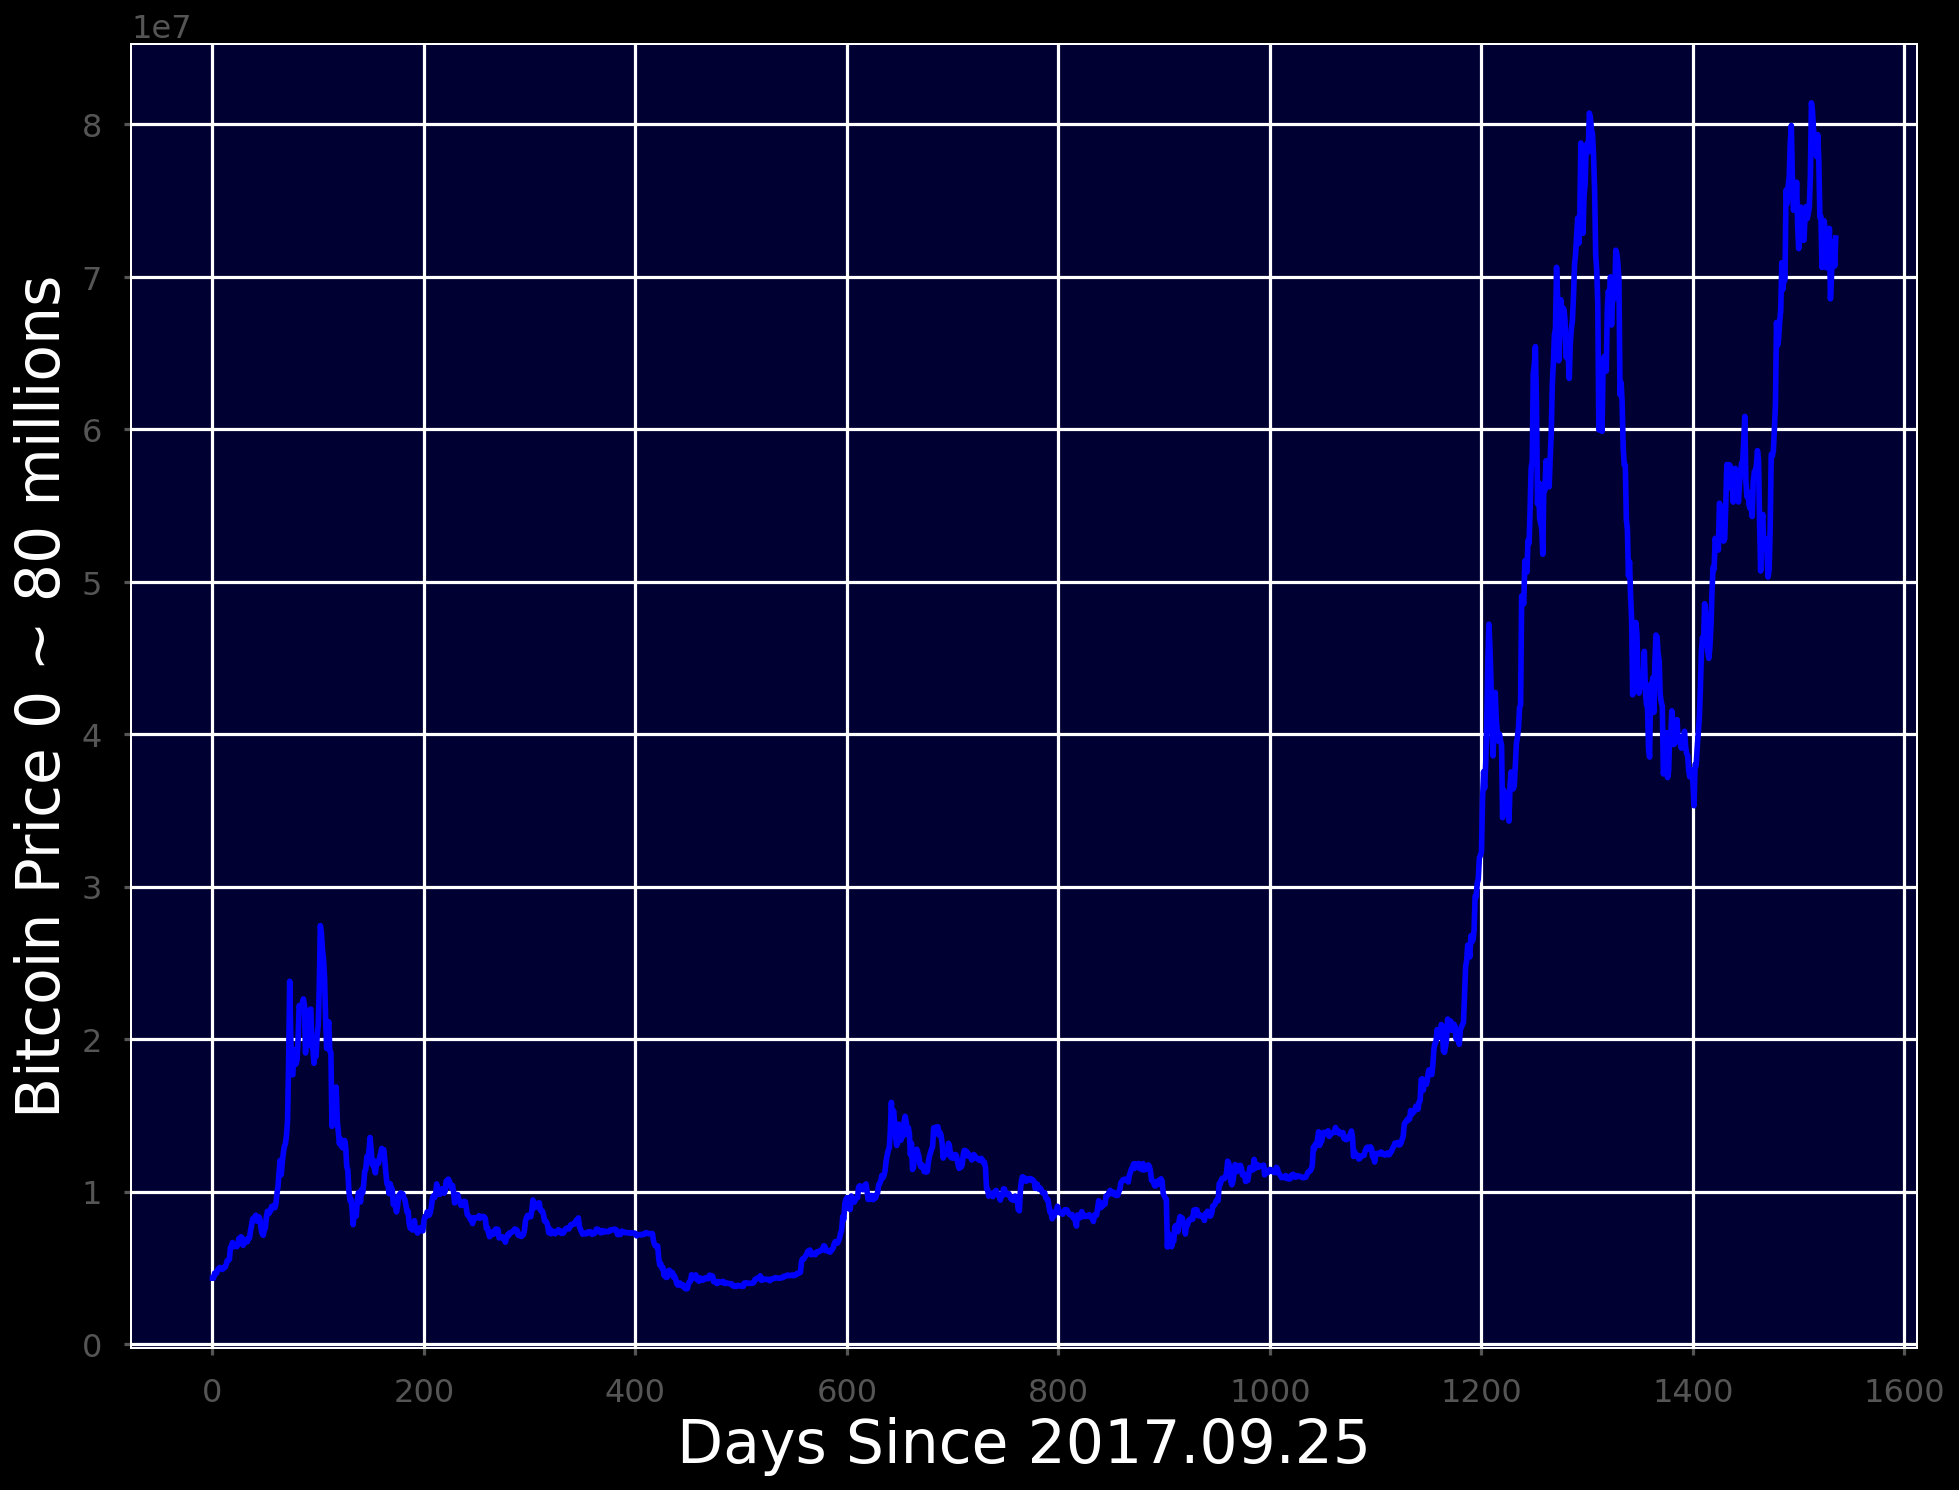

In [625]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

plt.figure(figsize=(16, 12)).patch.set_facecolor('black')
plt.rcParams['axes.facecolor'] = "000033"
plt.plot(adjusted_index, bitcoin['y'], color='blue')
plt.xlabel('Days Since 2017.09.25', fontsize = 30, color = "white")
plt.ylabel('Bitcoin Price 0 ~ 80 millions',fontsize = 30, color = "white")

# plt.plot의 인자로 x가 datetime 형식이 들어가면 에러가 발생, 따라서 인덱스를 X 축으로 사용.
plt.show()

In [626]:
# for i in range(len(bitcoin)):
#   bitcoin['ds'][i] = bitcoin['ds'][i].strftime("%Y-%m-%d")

# bitcoin_date_reshape = np.array(bitcoin_date).reshape(-1, 1)

# bitcoin_date_reshape -> 이거를 train 데이터에 넣으면 str 데이터 이기 때문에 오류 발생. 

#4 데이터 준비.

1. 데이터 정제
1. 범주형 데이터 다루기 -> 단변량 회기 -> 범주형 데이터 존재하지않음 (PASS)
1. 변환기 만들기 -> 위에서 특징조합 진행하지 않았으므로 (PASS)
1. 특징 스케일링
1. 변환 파이프라인

##4-1 데이터 정제. 

1. Na 값 처리.


In [627]:
#test set, train set을 나눌 때 사용한 adjusted_index 및 bitcoin_price 의 NA값이 있다면 처리

print("adjusted_index의 Na값은 :" ,np.isnan(adjusted_index).sum(), "개 입니다.")
print("bitcoin_price의 Na값은 :" ,np.isnan(bitcoin_price).sum(), "개 입니다.")

# 데이터의 Na값이 존재하지 않으므로 다음단계로 넘어갑니다.

adjusted_index의 Na값은 : 0 개 입니다.
bitcoin_price의 Na값은 : 0 개 입니다.


##4-4 특징 스케일링.
1. 비트코인은 단위가 천만이므로 매우 큼. 즉 변수의 이동이 크기 때문에 스케일링 필수. <br>
  -> 비트코인은 StandardScaler 대신 MinMaxScaler 사용 <br>
&nbsp; &nbsp; &nbsp;  why : 가격 예측을 위해선 나중에 다시 원래 가격으로 변환해야하기 때문. <br>
&nbsp; &nbsp; &nbsp;  + StandardScaler보다 성능은 떨어질지라도 스케일링 하면 결과가 많이 좋아짐. 



In [628]:
# #MinMaxScaler 사용한 특징 스케일링.

# adjusted_index, bitcoin_price

# from sklearn.preprocessing import MinMaxScaler
# scalerX = MinMaxScaler()
# scalerY = MinMaxScaler()

# X_train_date = scalerX.fit_transform(X_train_date)
# X_test_date = scalerX.transform(X_test_date)
# next10day_index = scalerX.transform(next10day_index)
# adjusted_index = scalerX.transform(adjusted_index)


# bitcoin_price_sc = scalerY.fit_transform(bitcoin_price)
# y_train_price = scalerY.fit_transform(y_train_price)
# y_test_price = scalerY.transform(y_test_price)



# # index_scaler = scaler.fit_transform(adjusted_index)
# # bitcoin_price_sclaer = scaler.fit_transform(bitcoin_price)


# # train_d2 = pd.DataFrame(train_d1,columns=data_new.columns)

## 4-5 변환 파이프라인 
-> 합칠 데이터가 없음. 스케일링 단계에서 처리 해주고, 파이프라인은 사용 X

#5. 학습

1. 모델선택
1. 학습
1. 평가.

In [629]:
def plot_predictions(x, y, z, pred, algo_name, color):
    plt.figure(figsize=(12, 8)).patch.set_facecolor('black')
    plt.rcParams['axes.facecolor'] = "000033"
    plt.plot(x, y, color='blue')
    plt.plot(z, pred, linestyle='dashed', color=color)
    plt.title('BitCoin Price Prediction', size=20)
    plt.xlabel('Days Since 2017.09.25', fontsize = 20, color = "white")
    plt.ylabel('Bitcoin Price', fontsize = 20, color = "white")
    plt.legend(['Bitcoin Price ', algo_name], prop={'size': 20}, facecolor='darkgrey')
    plt.xticks()
    plt.yticks()
    plt.show()


##5-1 Linear Regreesion Model 사용하여 예측하기.
1. 모델선택 -> Linear Regreesion Model
2. 학습데이터 -> MinMaxScaler를 통해 스케일링한 테스트 데이터.
3. MAE, MSE를 통한 학습데이터 평가 ++ 시각화.

In [630]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

lin_clf = linear_model.LinearRegression()
reg_clf = lin_clf.fit(X_train_date, y_train_price)

In [631]:
lin_clf_pred = reg_clf.predict(X_test_date)
# svm_clf_test_pred = svm_clf.predict(X_test_date)

print('MAE:', mean_absolute_error(lin_clf_pred, y_test_price))
print('MSE:',mean_squared_error(lin_clf_pred, y_test_price))

MAE: 0.4113623520956256
MSE: 0.1708697181059533


In [632]:
#Linear Regression 사용시 정규 방적식의 편향과 기울기.
# y = reg_clf.coef_ * x + reg_clf.intercept_
reg_clf.intercept_, reg_clf.coef_

(array([-0.09620182]), array([[0.60359551]]))

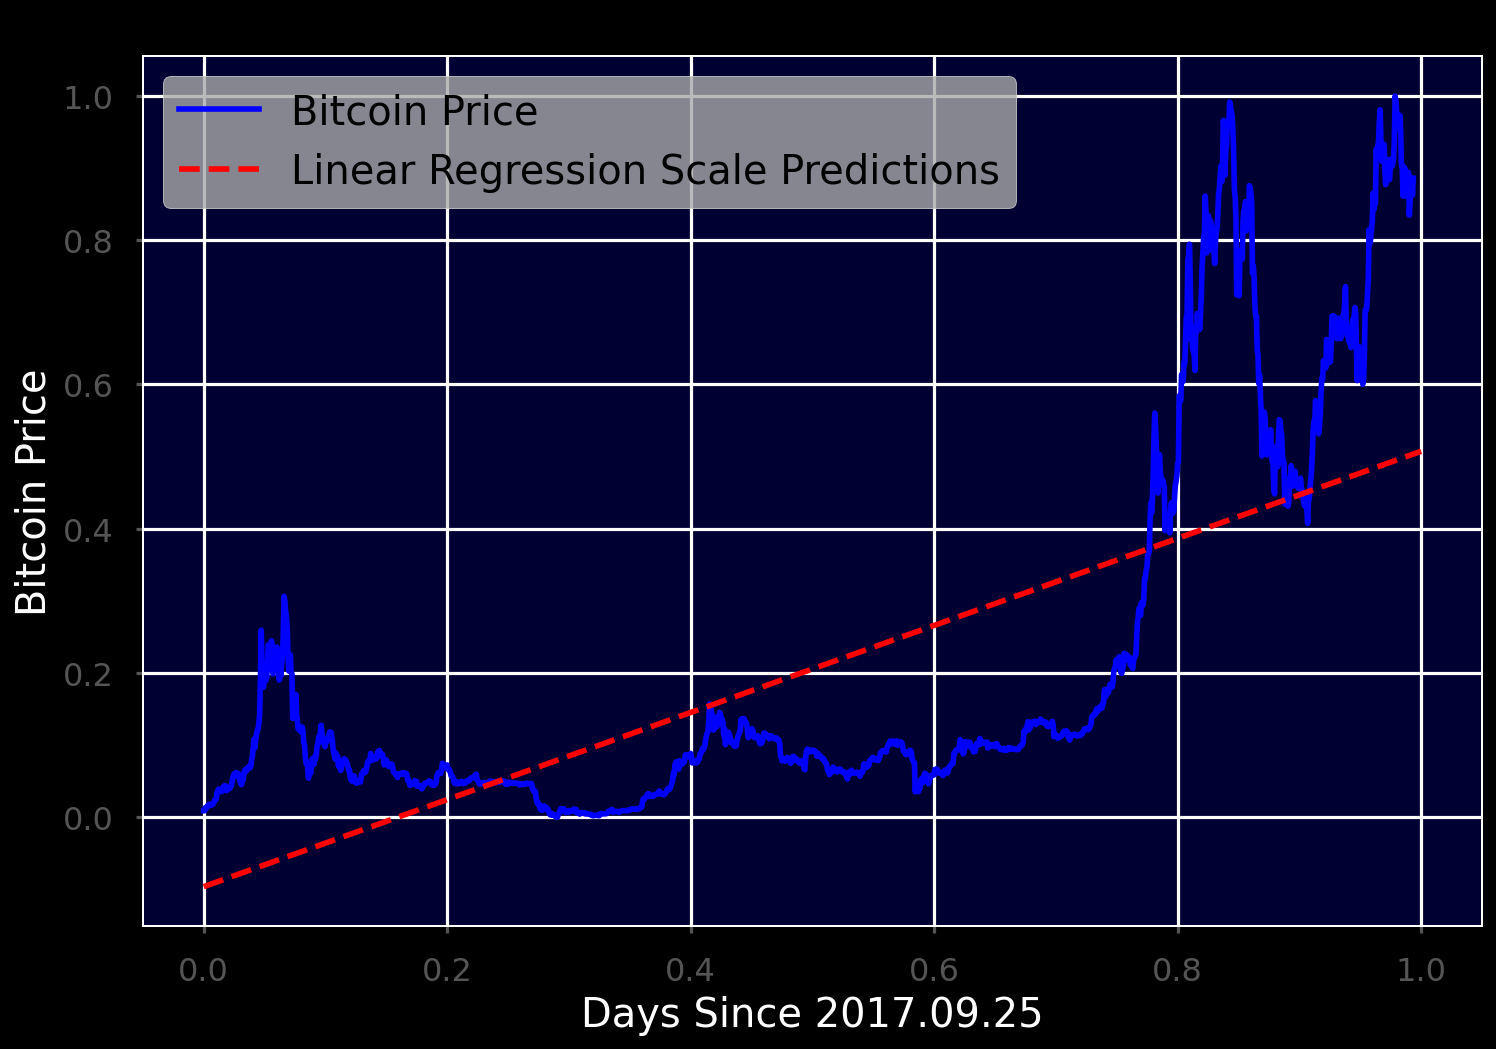

In [633]:
#스케일링 데이터로 학습한 그래프 시각화. (스케일링을 진행하여 x,y가 1임.)
lin_clf_pred = reg_clf.predict(next10day_index_sc)
plot_predictions(adjusted_index_sc, bitcoin_price_sc, next10day_index_sc ,lin_clf_pred, 'Linear Regression Scale Predictions', 'red')

### scaler.inverse_transform()을 통한 정규화 해제 후 시각화


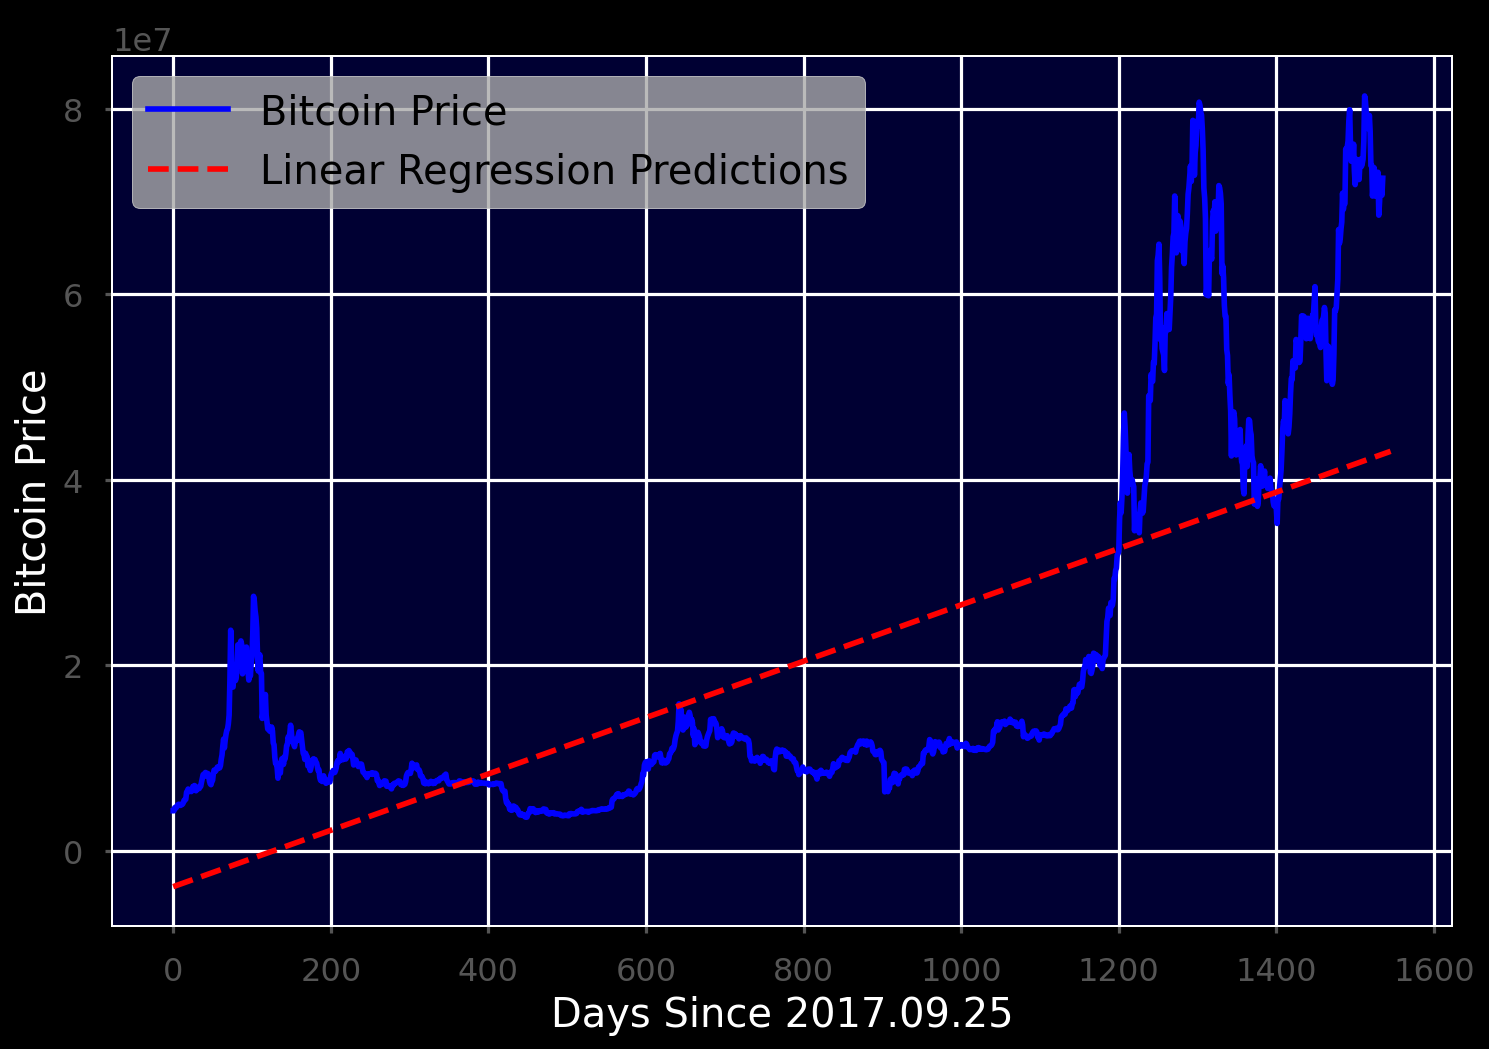

In [634]:
lin_pred_inverse = scalerY.inverse_transform(lin_clf_pred)
plot_predictions(adjusted_index, bitcoin_price, next10day_index, lin_pred_inverse, 'Linear Regression Predictions', 'red')

In [635]:
# Future predictions using Prophet
lin_df = pd.DataFrame({'Date': next10day_date[-10:], 'Linear Regression model predict Next 10 day bitcoin price':  np.round(lin_pred_inverse[-10:].reshape(-1))})
lin_df.style.background_gradient(cmap='gray')

,Date,Linear Regression model predict Next 10 day bitcoin price
1537,2021-12-02,42812615.000000
1538,2021-12-03,42843004.000000
1539,2021-12-04,42873392.000000
1540,2021-12-05,42903780.000000
1541,2021-12-06,42934169.000000
1542,2021-12-07,42964557.000000
1543,2021-12-08,42994946.000000
1544,2021-12-09,43025334.000000
1545,2021-12-10,43055722.000000
1546,2021-12-11,43086111.000000


In [636]:
# # Future predictions using Prophet
# svm_df = pd.DataFrame({'Date': next10day_date[-10:], 'SVC model predict Next 10 day bitcoin price': np.round(svm_pred[-10:].reshape(-1,1))})
# svm_df.style.background_gradient(cmap='rainbow')

##5-2 SVM (Support Vector Regression) Model을 사용하여 예측
1. 모델선택 -> SVM 모델 중 kernel = 'poly' , 'rbf' 사용
1. 학습데이터 -> Linear model과 동일.
1. MAE, MSE를 통한 학습 데이터 평가 및 시각화.

### 1. SVM 모델 중 kernel = "poly" 를 사용한 모델로 예측.

In [637]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly', degree=3, coef0=0.01, C=10)
svm_confirmed.fit(X_train_date, y_train_price)

SVR(C=10, coef0=0.01, kernel='poly')

In [638]:
svm_test_pred = svm_confirmed.predict(X_test_date)
# svm_clf_test_pred = svm_clf.predict(X_test_date)

print('MAE:', mean_absolute_error(svm_test_pred, y_test_price))
print('MSE:',mean_squared_error(svm_test_pred, y_test_price))

MAE: 0.04959551620327002
MSE: 0.0031796414200995953


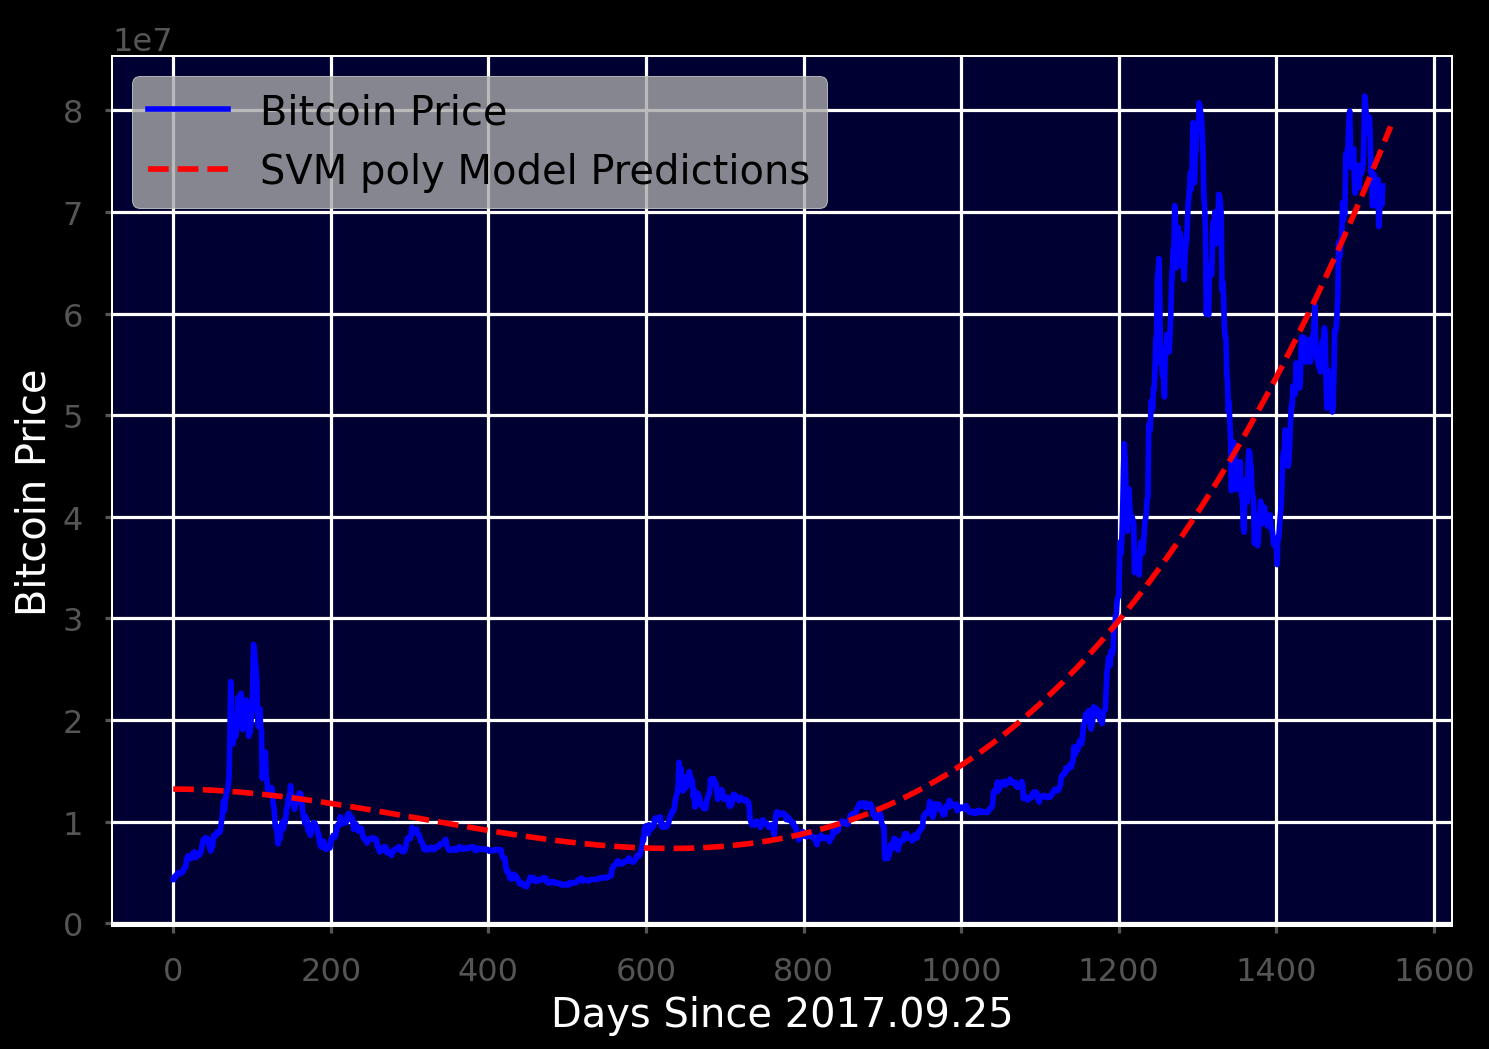

In [639]:
svm_pred = svm_confirmed.predict(next10day_index_sc)
svm_pred_inverse = scalerY.inverse_transform(svm_pred.reshape(-1,1))
plot_predictions(adjusted_index, bitcoin_price, next10day_index, svm_pred_inverse, 'SVM poly Model Predictions', 'red')

In [640]:
# Future predictions using Prophet
svm_df = pd.DataFrame({'Date': next10day_date[-10:], 'SVC model predict Next 10 day bitcoin price': np.round(svm_pred_inverse[-10:].reshape(-1))})
svm_df.style.background_gradient(cmap='rainbow')

,Date,SVC model predict Next 10 day bitcoin price
1537,2021-12-02,76682066.000000
1538,2021-12-03,76872830.000000
1539,2021-12-04,77063930.000000
1540,2021-12-05,77255364.000000
1541,2021-12-06,77447135.000000
1542,2021-12-07,77639240.000000
1543,2021-12-08,77831682.000000
1544,2021-12-09,78024460.000000
1545,2021-12-10,78217575.000000
1546,2021-12-11,78411026.000000


### 2. SVM 모델 중 kernel = 'rbf' 활용.

In [641]:
# svm_confirmed = svm_search.best_estimator_
svm_rbf_clf =  SVR(kernel="rbf", gamma = 10, C = 100, epsilon=0.01)
svm_rbf_clf.fit(X_train_date, y_train_price)

SVR(C=100, epsilon=0.01, gamma=10)

In [642]:
svm_rbf_pred = svm_rbf_clf.predict(X_test_date)

print('MAE:', mean_absolute_error(svm_rbf_pred, y_test_price))
print('MSE:',mean_squared_error(svm_rbf_pred, y_test_price))

MAE: 0.07827526462026003
MSE: 0.007223596804206159


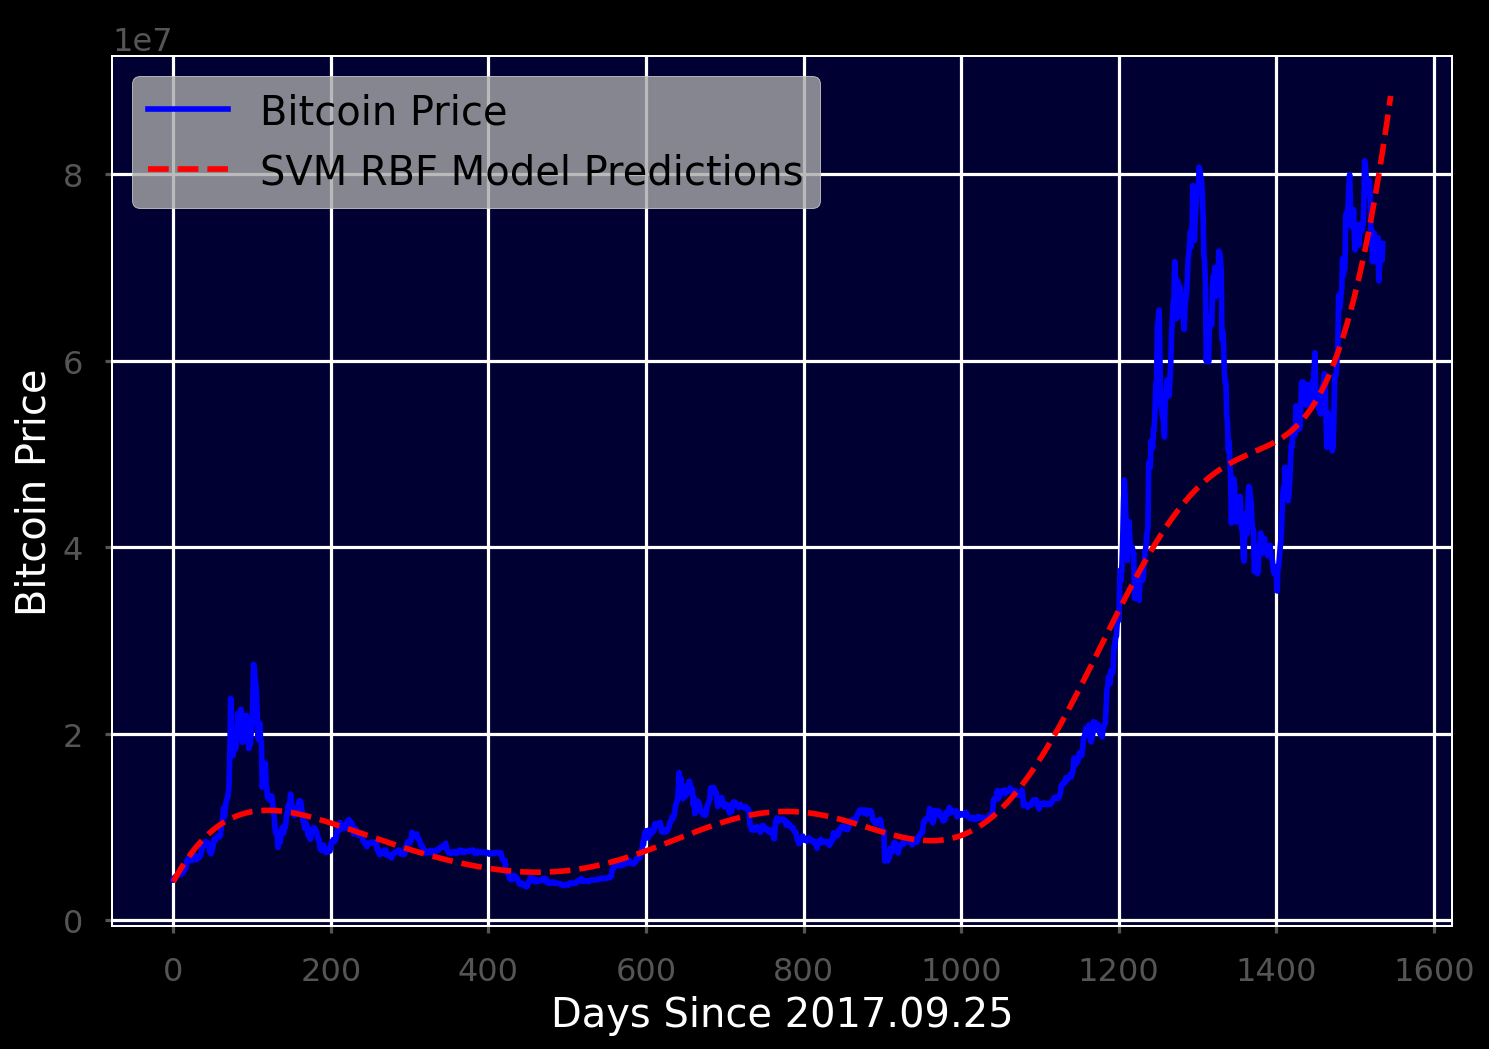

In [643]:
svm_rbf_pred = svm_rbf_clf.predict(next10day_index_sc)
svm_rbf_inverse = scalerY.inverse_transform(svm_rbf_pred.reshape(-1,1))
plot_predictions(adjusted_index, bitcoin_price, next10day_index, svm_rbf_inverse, 'SVM RBF Model Predictions', 'red')

In [644]:
# Future predictions using Prophet
svm_rbf_df = pd.DataFrame({'Date': next10day_date[-10:], 'SVC RBF model predict Next 10 day bitcoin price': np.round(svm_rbf_inverse[-10:].reshape(-1))})
svm_rbf_df.style.background_gradient(cmap='rainbow')

,Date,SVC RBF model predict Next 10 day bitcoin price
1537,2021-12-02,83110358.000000
1538,2021-12-03,83666404.000000
1539,2021-12-04,84229094.000000
1540,2021-12-05,84798463.000000
1541,2021-12-06,85374546.000000
1542,2021-12-07,85957380.000000
1543,2021-12-08,86547000.000000
1544,2021-12-09,87143440.000000
1545,2021-12-10,87746735.000000
1546,2021-12-11,88356920.000000


In [645]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     "kernel": ["rbf"],
#     "C": [10, 100, 1000],
#     "gamma" : [3,4,5,6,7,8,9,10,9,10],
#     "coef0" : [0.01]
#     }

# grid = GridSearchCV(SVR(), parameters, verbose=2)
# grid.fit(X_train_date, y_train_price)

In [646]:
# grid.best_params_

In [647]:
# # svm_confirmed = svm_search.best_estimator_
# svm_rbf_clf =  SVR(kernel="rbf", gamma = grid.best_params_['gamma'], C = grid.best_params_['C'], coef0=grid.best_params_['coef0'])
# svm_rbf_clf.fit(X_train_date, y_train_price)

In [648]:
# svm_rbf_pred = svm_rbf_clf.predict(next10day_index_sc)
# svm_rbf_inverse = scalerY.inverse_transform(svm_rbf_pred.reshape(-1,1))
# plot_predictions(adjusted_index, bitcoin_price, next10day_index, svm_rbf_inverse, 'SVM poly Predictions', 'red')

##5-3 RIDGE Regression Model을 사용하여 예측
1. 모델선택 alpha를 다양하게 하여 GridSearch 시행.
1. 학습데이터 -> Linear model과 동일.
1. MAE, MSE를 통한 학습 데이터 평가 및 시각화.

In [649]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = np.array([
                   1000,100,10,1,0.1,0.01, 0.001, 0.0001, 0.00001, 0
])
ridge_reg = Ridge(random_state = 42)
grid_ridge = GridSearchCV(estimator=ridge_reg, param_grid=dict(alpha=alphas), verbose = 5)

In [650]:
grid_ridge.fit(X_train_date, y_train_price)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................alpha=1000.0;, score=-3.164 total time=   0.0s
[CV 2/5] END ....................alpha=1000.0;, score=-86.680 total time=   0.0s
[CV 3/5] END ....................alpha=1000.0;, score=-36.790 total time=   0.0s
[CV 4/5] END .....................alpha=1000.0;, score=-3.154 total time=   0.0s
[CV 5/5] END ....................alpha=1000.0;, score=-11.911 total time=   0.0s
[CV 1/5] END ......................alpha=100.0;, score=-0.557 total time=   0.0s
[CV 2/5] END .....................alpha=100.0;, score=-44.677 total time=   0.0s
[CV 3/5] END .....................alpha=100.0;, score=-38.157 total time=   0.0s
[CV 4/5] END ......................alpha=100.0;, score=-8.896 total time=   0.0s
[CV 5/5] END .....................alpha=100.0;, score=-11.351 total time=   0.0s
[CV 1/5] END ......................alpha=10.0;, score=-17.888 total time=   0.0s
[CV 2/5] END ......................alpha=10.0;, 

GridSearchCV(estimator=Ridge(random_state=42),
             param_grid={'alpha': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04,
       1.e-05, 0.e+00])},
             verbose=5)

In [651]:
print("grid.best_score_  : ", grid_ridge.best_score_)
print("grid.best_estimator_", grid_ridge.best_estimator_.alpha)

grid.best_score_  :  -20.727602955523885
grid.best_estimator_ 100.0


In [652]:
rideg_grid_reg = Ridge(alpha=grid_ridge.best_estimator_.alpha)
rideg_grid_reg.fit(X_train_date, y_train_price)

Ridge(alpha=100.0)

In [653]:
rideg_grid_pred = rideg_grid_reg.predict(X_test_date)

print('MAE:', mean_absolute_error(rideg_grid_pred, y_test_price))
print('MSE:',mean_squared_error(rideg_grid_pred, y_test_price))

MAE: 0.5495537790950061
MSE: 0.30359408914819525


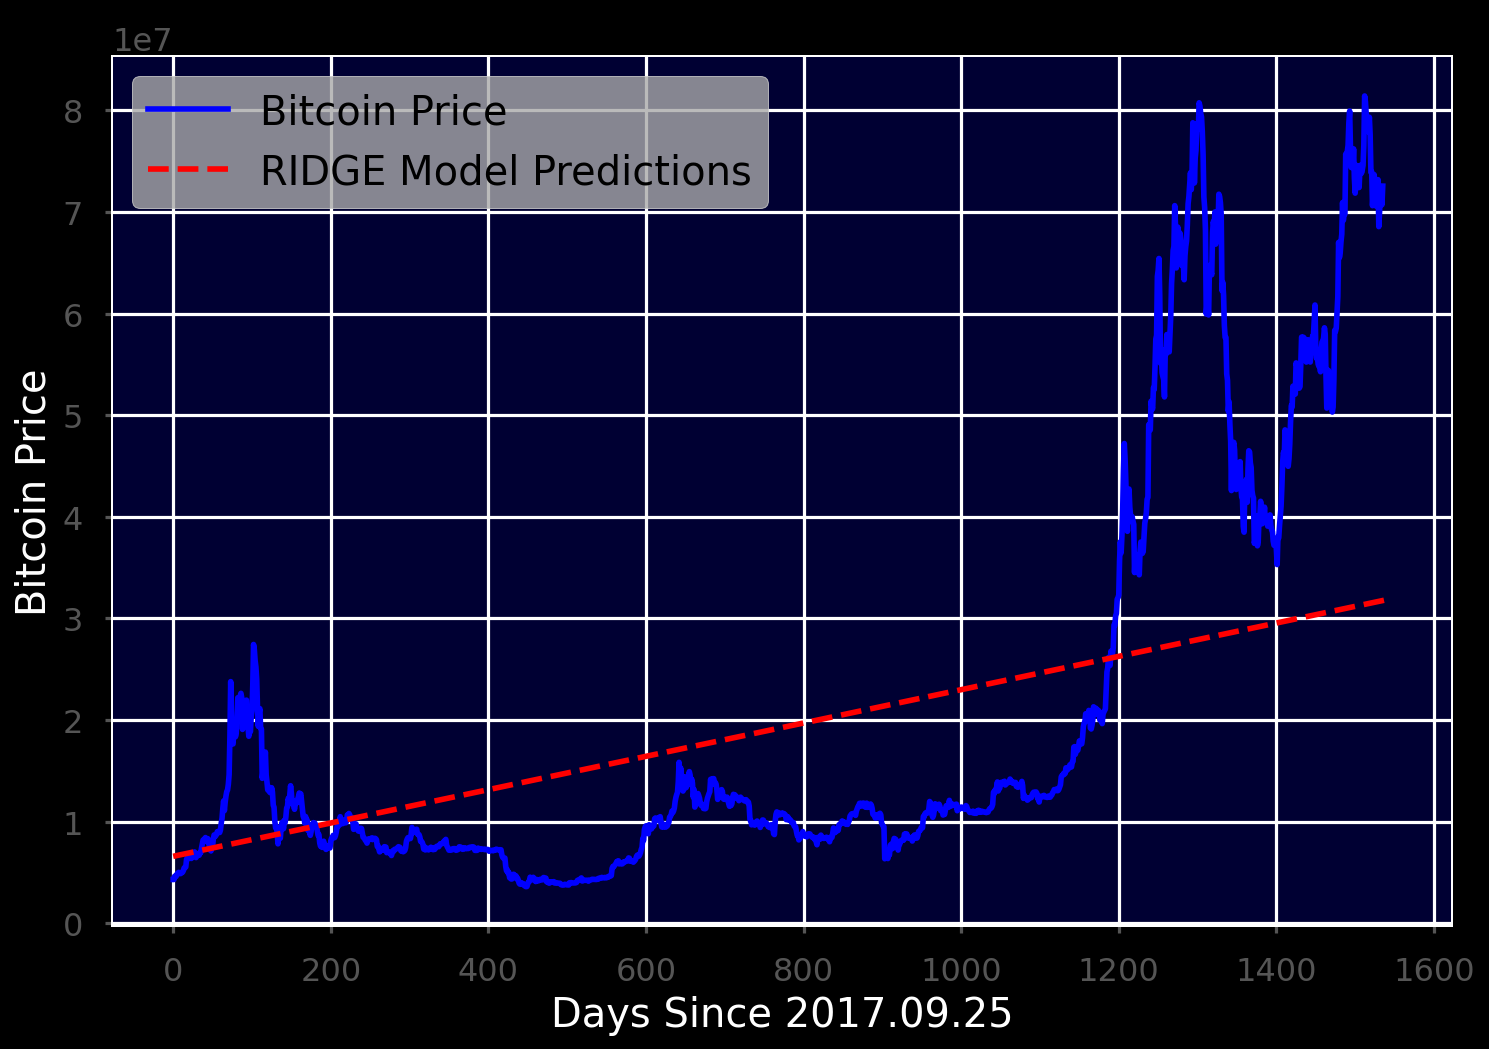

In [654]:
rideg_grid_pred = rideg_grid_reg.predict(next10day_index_sc)
rideg_grid_pred_inverse = scalerY.inverse_transform(rideg_grid_pred.reshape(-1,1))
plot_predictions(adjusted_index, bitcoin_price, next10day_index, rideg_grid_pred_inverse, 'RIDGE Model Predictions', 'red')

##5-4 LASSO Regression Model을 사용하여 예측
1. 모델선택 Rigde와 동일하게 alpha에 대해 GridSearch 진행.
1. 학습데이터 -> Linear model과 동일.
1. MAE, MSE를 통한 학습 데이터 평가 및 시각화.

In [655]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.array([
                   1000,100,10,1,0.1,0.01, 0.001, 0.0001, 0.00001, 0
])
lasso_reg = Lasso(random_state = 42)
grid_lasso = GridSearchCV(estimator=lasso_reg, param_grid=dict(alpha=alphas), verbose = 5)

In [656]:
grid_lasso.fit(X_train_date, y_train_price)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................alpha=1000.0;, score=-4.793 total time=   0.0s
[CV 2/5] END ....................alpha=1000.0;, score=-98.277 total time=   0.0s
[CV 3/5] END ....................alpha=1000.0;, score=-36.602 total time=   0.0s
[CV 4/5] END .....................alpha=1000.0;, score=-2.322 total time=   0.0s
[CV 5/5] END ....................alpha=1000.0;, score=-12.012 total time=   0.0s
[CV 1/5] END ......................alpha=100.0;, score=-4.793 total time=   0.0s
[CV 2/5] END .....................alpha=100.0;, score=-98.277 total time=   0.0s
[CV 3/5] END .....................alpha=100.0;, score=-36.602 total time=   0.0s
[CV 4/5] END ......................alpha=100.0;, score=-2.322 total time=   0.0s
[CV 5/5] END .....................alpha=100.0;, score=-12.012 total time=   0.0s
[CV 1/5] END .......................alpha=10.0;, score=-4.793 total time=   0.0s
[CV 2/5] END ......................alpha=10.0;, 

GridSearchCV(estimator=Lasso(random_state=42),
             param_grid={'alpha': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04,
       1.e-05, 0.e+00])},
             verbose=5)

In [657]:
print("grid.best_score_  : ", grid_lasso.best_score_)
print("grid.best_estimator_", grid_lasso.best_estimator_.alpha)

grid.best_score_  :  -21.153145786708436
grid.best_estimator_ 0.01


In [658]:
lasso_grid_reg = Lasso(alpha=grid_lasso.best_estimator_.alpha, max_iter = 100000)
lasso_grid_reg.fit(X_train_date, y_train_price)

Lasso(alpha=0.01, max_iter=100000)

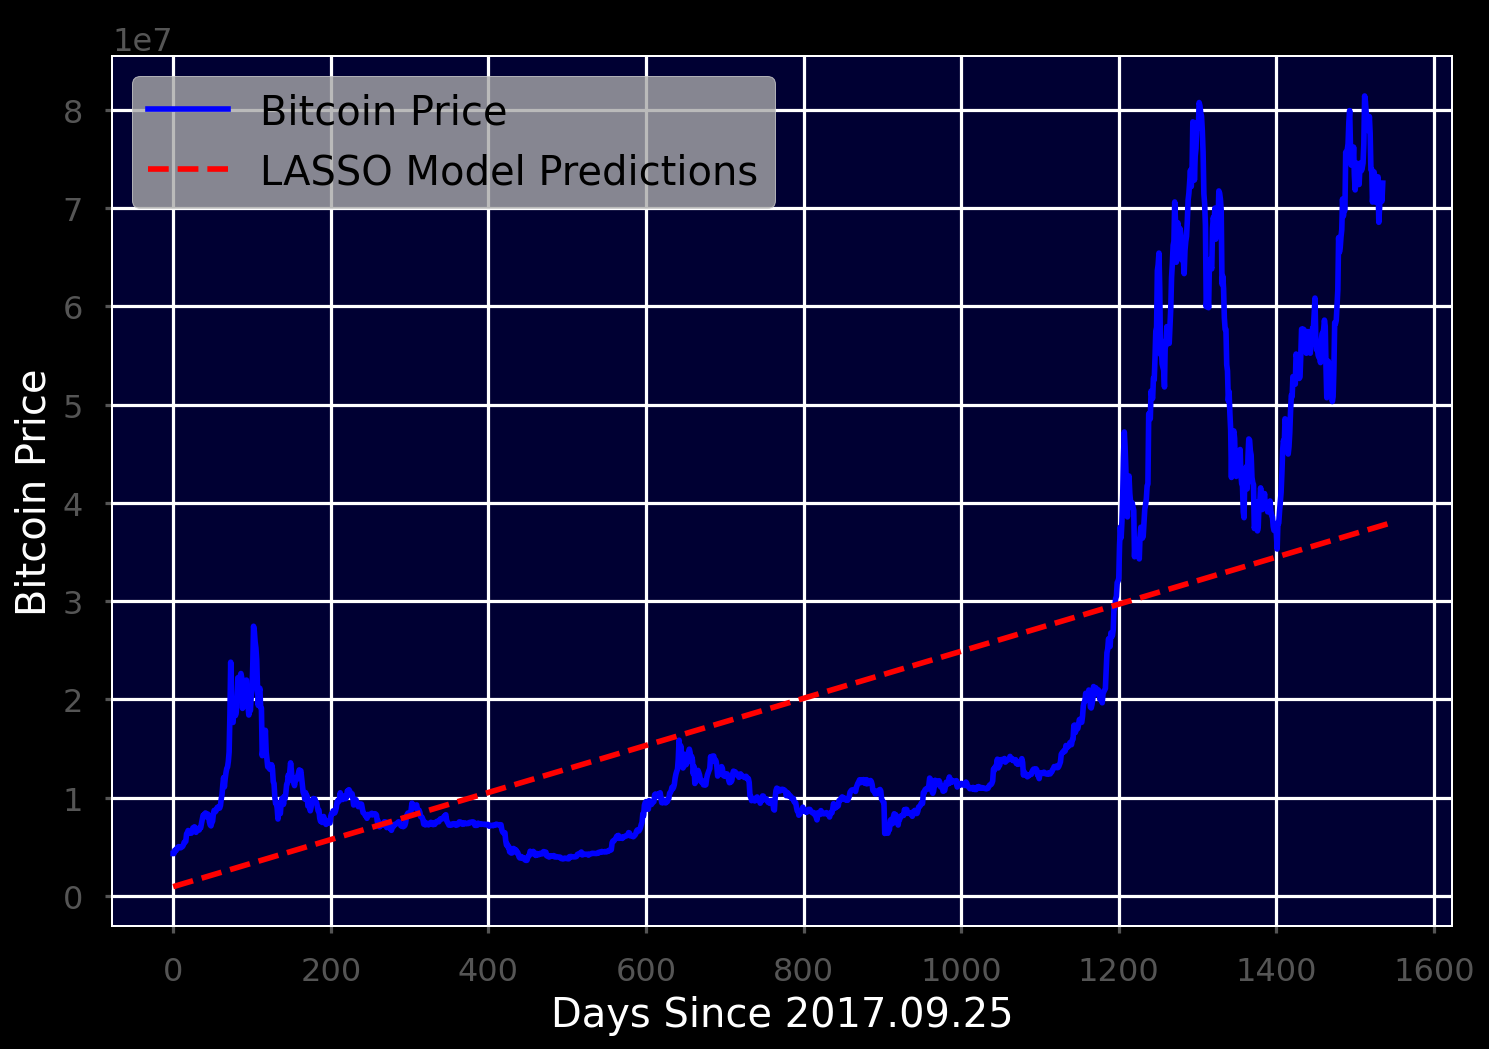

In [659]:
lasso_grid_pred = lasso_grid_reg.predict(next10day_index_sc)
lasso_grid_pred_inverse = scalerY.inverse_transform(lasso_grid_pred.reshape(-1,1))
plot_predictions(adjusted_index, bitcoin_price, next10day_index, lasso_grid_pred_inverse, 'LASSO Model Predictions', 'red')

##5-5 Prophet



In [660]:
from fbprophet import Prophet
Prophet_model = Prophet()
Prophet_model.fit(bitcoin)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [661]:
#10일 뒤 예측 

future_24 = Prophet_model.make_future_dataframe(periods=10, freq='D')
forecast = Prophet_model.predict(future_24)

In [662]:
forecast[-10:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1529,2021-12-02,7.193479e+07,6.268787e+07,7.744136e+07,7.193479e+07,7.193479e+07,-2.159969e+06,-2.159969e+06,-2.159969e+06,-89279.127138,-89279.127138,-89279.127138,-2.070690e+06,-2.070690e+06,-2.070690e+06,0.0,0.0,0.0,6.977482e+07
1530,2021-12-03,7.203612e+07,6.223961e+07,7.772414e+07,7.203612e+07,7.203612e+07,-2.030032e+06,-2.030032e+06,-2.030032e+06,57002.408297,57002.408297,57002.408297,-2.087034e+06,-2.087034e+06,-2.087034e+06,0.0,0.0,0.0,7.000609e+07
1531,2021-12-04,7.213745e+07,6.186298e+07,7.801458e+07,7.213745e+07,7.213745e+07,-2.024637e+06,-2.024637e+06,-2.024637e+06,74324.242540,74324.242540,74324.242540,-2.098962e+06,-2.098962e+06,-2.098962e+06,0.0,0.0,0.0,7.011281e+07
1532,2021-12-05,7.223878e+07,6.249247e+07,7.814977e+07,7.223878e+07,7.223878e+07,-2.069500e+06,-2.069500e+06,-2.069500e+06,35647.457833,35647.457833,35647.457833,-2.105148e+06,-2.105148e+06,-2.105148e+06,0.0,0.0,0.0,7.016928e+07
1533,2021-12-06,7.234011e+07,6.277499e+07,7.862080e+07,7.234011e+07,7.234011e+07,-2.090407e+06,-2.090407e+06,-2.090407e+06,13748.358384,13748.358384,13748.358384,-2.104155e+06,-2.104155e+06,-2.104155e+06,0.0,0.0,0.0,7.024970e+07
1534,2021-12-07,7.244144e+07,6.214373e+07,7.776802e+07,7.244144e+07,7.244144e+07,-2.185656e+06,-2.185656e+06,-2.185656e+06,-91192.580499,-91192.580499,-91192.580499,-2.094464e+06,-2.094464e+06,-2.094464e+06,0.0,0.0,0.0,7.025578e+07
1535,2021-12-08,7.254277e+07,6.283467e+07,7.782625e+07,7.254277e+07,7.254277e+07,-2.074760e+06,-2.074760e+06,-2.074760e+06,-250.759417,-250.759417,-250.759417,-2.074510e+06,-2.074510e+06,-2.074510e+06,0.0,0.0,0.0,7.046801e+07
1536,2021-12-09,7.264409e+07,6.281300e+07,7.864830e+07,7.264409e+07,7.264409e+07,-2.132003e+06,-2.132003e+06,-2.132003e+06,-89279.127138,-89279.127138,-89279.127138,-2.042724e+06,-2.042724e+06,-2.042724e+06,0.0,0.0,0.0,7.051209e+07
1537,2021-12-10,7.274542e+07,6.364712e+07,7.807582e+07,7.274542e+07,7.274542e+07,-1.940575e+06,-1.940575e+06,-1.940575e+06,57002.408297,57002.408297,57002.408297,-1.997578e+06,-1.997578e+06,-1.997578e+06,0.0,0.0,0.0,7.080485e+07
1538,2021-12-11,7.284675e+07,6.327095e+07,7.952855e+07,7.284675e+07,7.284675e+07,-1.863305e+06,-1.863305e+06,-1.863305e+06,74324.242540,74324.242540,74324.242540,-1.937629e+06,-1.937629e+06,-1.937629e+06,0.0,0.0,0.0,7.098345e+07


In [663]:
print(forecast['ds'][-10:])
print(forecast['trend'][-10:])

1529   2021-12-02
1530   2021-12-03
1531   2021-12-04
1532   2021-12-05
1533   2021-12-06
1534   2021-12-07
1535   2021-12-08
1536   2021-12-09
1537   2021-12-10
1538   2021-12-11
Name: ds, dtype: datetime64[ns]
1529    7.193479e+07
1530    7.203612e+07
1531    7.213745e+07
1532    7.223878e+07
1533    7.234011e+07
1534    7.244144e+07
1535    7.254277e+07
1536    7.264409e+07
1537    7.274542e+07
1538    7.284675e+07
Name: trend, dtype: float64


In [664]:
plt.rcParams['axes.facecolor'] = "#DDDDDD"

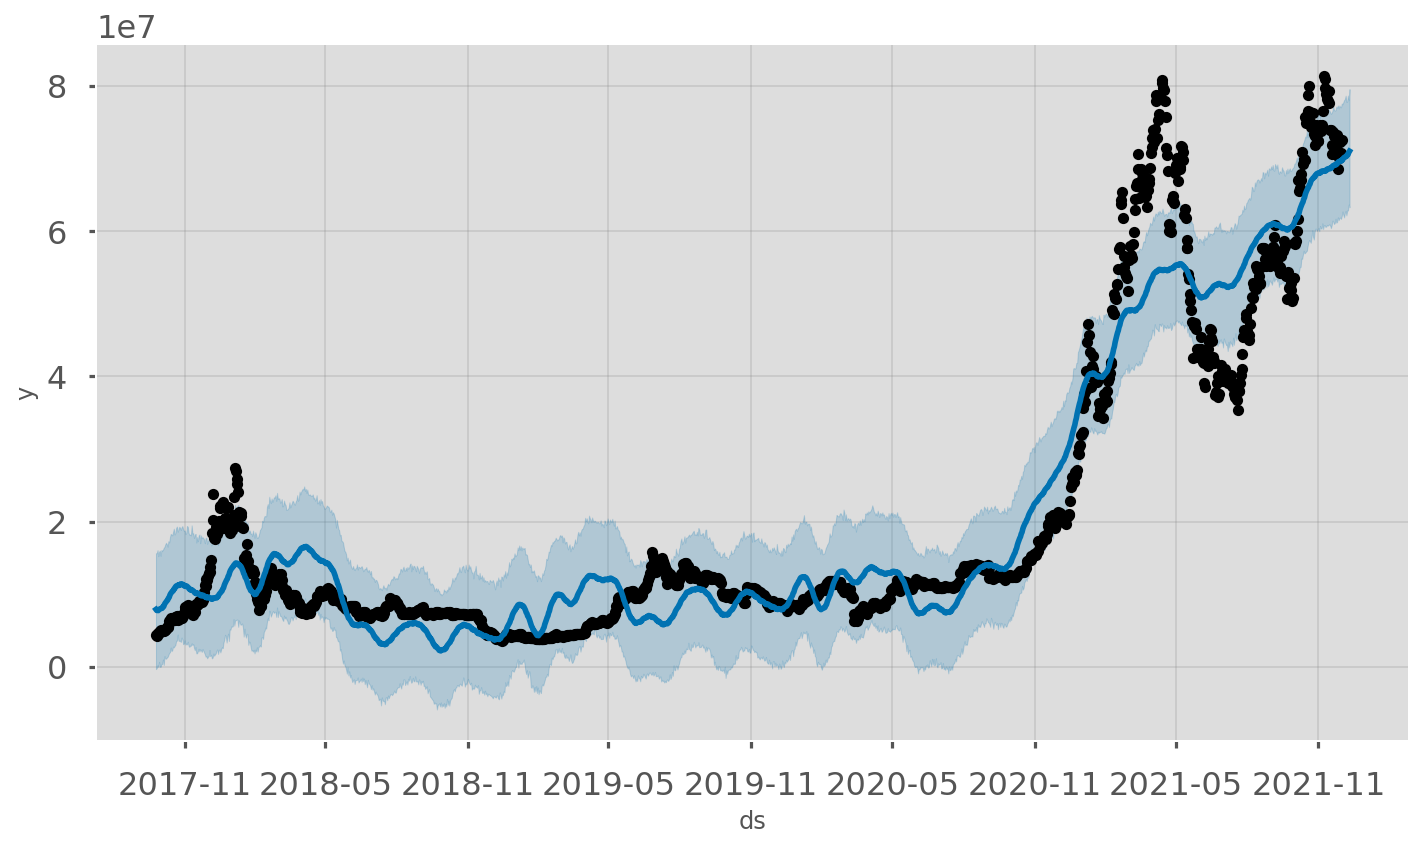

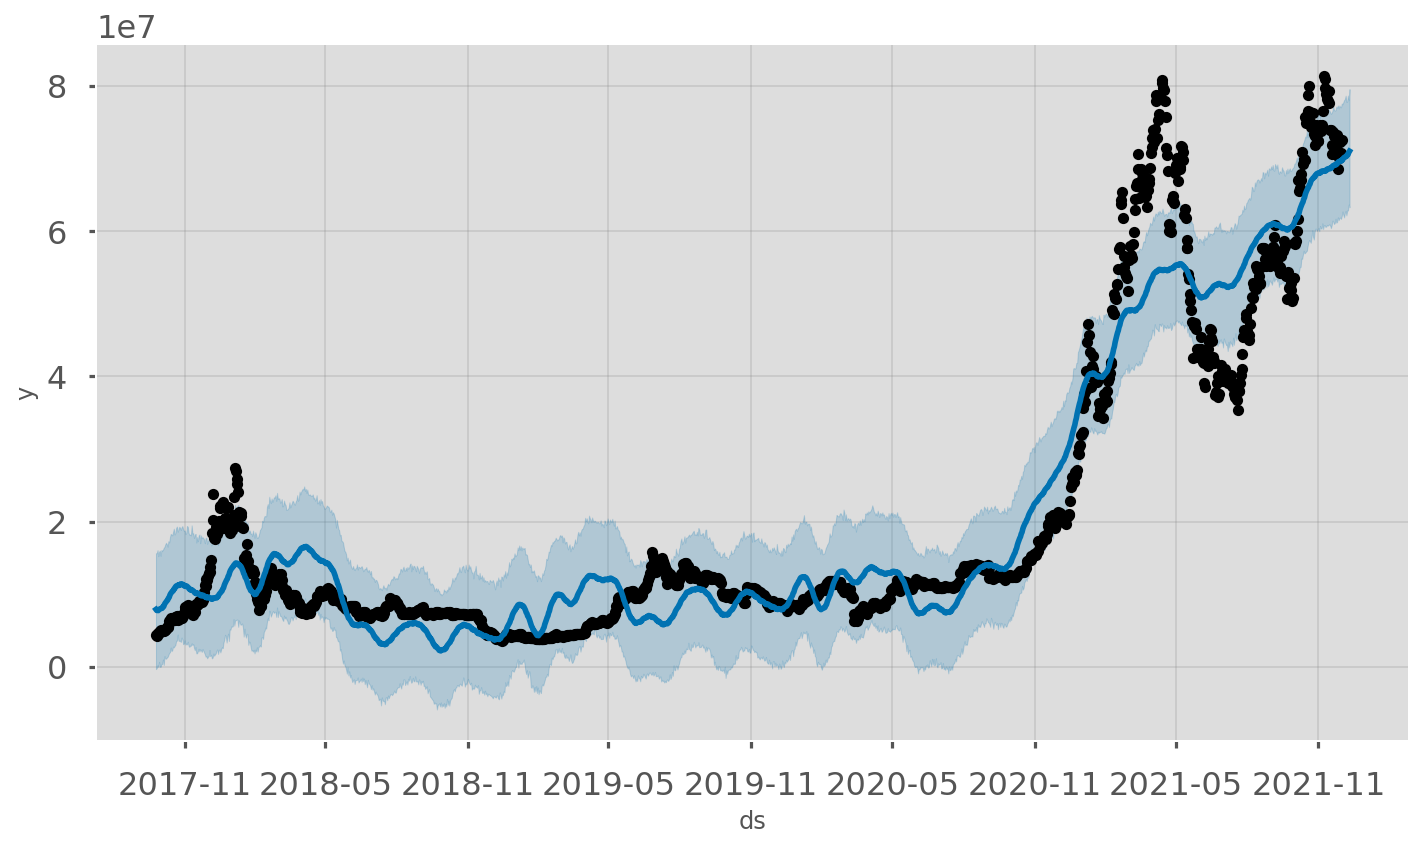

In [665]:
Prophet_model.plot(forecast)

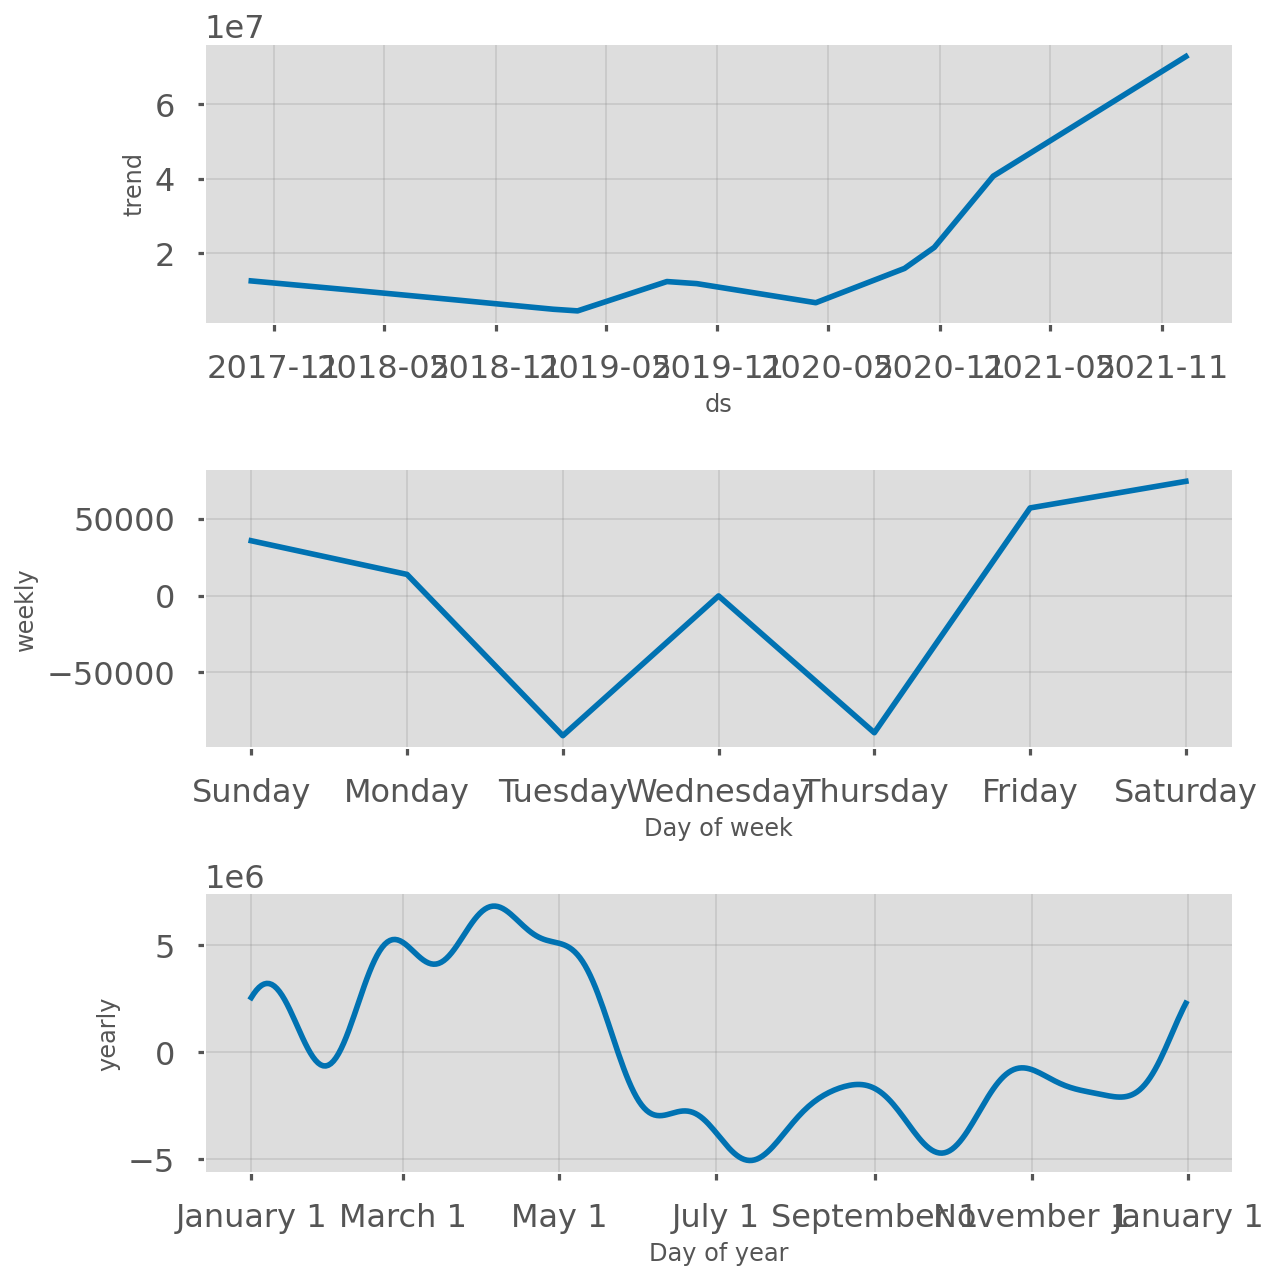

In [666]:
pig2 = Prophet_model.plot_components(forecast)

# 5번째. K-NeighborsClassifier

In [667]:
from sklearn.neighbors import KNeighborsRegressor

In [695]:
k_range = np.array([2,3,4,5,6,7,8,9,10])

knn = KNeighborsRegressor(n_neighbors=k_range , weights='distance')
grid = GridSearchCV(knn, param_grid=dict(n_neighbors=k_range), cv= 5)
grid.fit(adjusted_index_sc, bitcoin_price_sc)
print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_:",grid.best_estimator_.n_neighbors)


grid: GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                           weights='distance'),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})
grid.best_score_: -1.8319788622763826
grid.best_estimator_: 2


In [700]:
# Model for best neighbour
model = KNeighborsRegressor(n_neighbors=grid.best_estimator_.n_neighbors, weights='distance')
knn = model.fit(X_train_date, y_train_price)

In [701]:
knn_pred = knn.predict(X_test_date)
# svm_clf_test_pred = svm_clf.predict(X_test_date)

print('MAE:', mean_absolute_error(knn_pred, y_test_price))
print('MSE:',mean_squared_error(knn_pred, y_test_price))

MAE: 0.031880467747431265
MSE: 0.001544402941664917


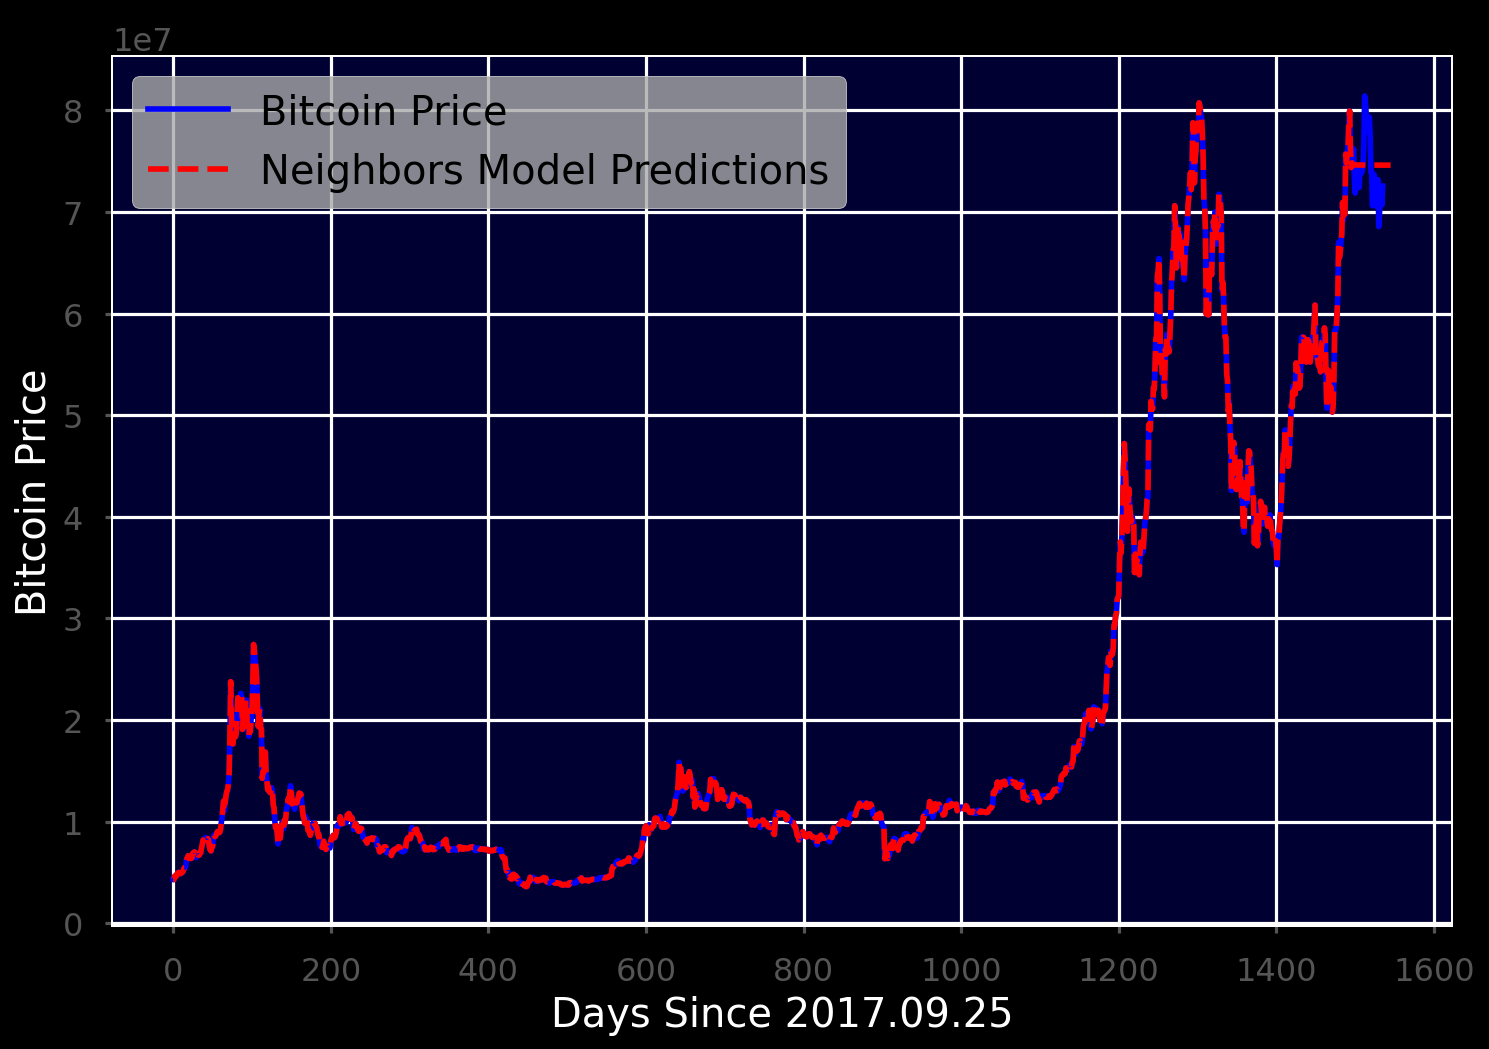

In [702]:
nei_clf_pred = knn.predict(next10day_index_sc)
nei_clf_inverse = scalerY.inverse_transform(nei_clf_pred.reshape(-1,1))
plot_predictions(adjusted_index, bitcoin_price, next10day_index, nei_clf_inverse, 'Neighbors Model Predictions', 'red')

In [699]:
# Future predictions using Prophet
knei_df = pd.DataFrame({'Date': next10day_date[-10:], 'SVC RBF model predict Next 10 day bitcoin price': np.round(nei_clf_inverse[-10:].reshape(-1))})
knei_df.style.background_gradient(cmap='rainbow')

,Date,SVC RBF model predict Next 10 day bitcoin price
1537,2021-12-02,71925333.000000
1538,2021-12-03,71803000.000000
1539,2021-12-04,71750571.000000
1540,2021-12-05,71721444.000000
1541,2021-12-06,71702909.000000
1542,2021-12-07,71690077.000000
1543,2021-12-08,71680667.000000
1544,2021-12-09,71673471.000000
1545,2021-12-10,71667789.000000
1546,2021-12-11,71663190.000000
